In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols


#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Librerías para manejar fechas
from datetime import datetime
import calendar

# Desplegar todas las columnas
pd.options.display.max_columns = None

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

/home/pilar/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/pilar/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df= pd.read_csv("datos/bikes.csv", index_col=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.set_index(["instant"], inplace= True)

In [4]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [5]:
df.tail(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
729,30-12-2019,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
730,31-12-2019,spring,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


## Renombrar columnas

In [6]:
cambio_columnas = {col :  col.lower().strip().replace(" ","_") for col in df.columns}

df.rename(columns = cambio_columnas, inplace=True)

df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

# Análisis exploratorio

#### - Shape

In [7]:
df.shape

(730, 15)

#### - Columnas

In [8]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### Info (columnas, tipo de datos y nulos)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 91.2+ KB


No hay nulos

#### - Describe: Principales estadísticos

In [10]:
# Descibe de columnas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021


In [11]:
# Número de columnas numéricas
print(len(df.describe().T))

13


In [12]:
df.describe(include = "object").T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


### - Presencia de nulos

In [13]:
df.stb.missing()

,missing,total,percent
dteday,0,730,0.0
season,0,730,0.0
yr,0,730,0.0
mnth,0,730,0.0
holiday,0,730,0.0
weekday,0,730,0.0
workingday,0,730,0.0
weathersit,0,730,0.0
temp,0,730,0.0
atemp,0,730,0.0


### - Presencia de duplicados

In [14]:
df.duplicated().sum()

0

In [15]:
# No se detectan registros duplicados.
# En el caso de que se detectaran aplicar:
# df.drop_duplicates(inplace=True)

### -Columnas categóricas valores únicos


In [16]:
df_categoricas = df.select_dtypes(include="object")

# Creamos un Dataframe a partir de un diccionario.
# Creamos dos listas para meter el nombre de la variable y los valores unicos
variable = []
n_uniques = []
for col in df_categoricas.columns: # Iteramos por las columnas de DF categoricas y apendeamos los distintos valores
    variable.append(col)
    n_uniques.append(df_categoricas[col].unique())
datos = {"variable": variable, "n_uniques": n_uniques} # Creamos el diccionario
df_valoresunicos = pd.DataFrame.from_dict(datos)
df_valoresunicos


,variable,n_uniques
0,dteday,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201..."
1,season,"[spring, summer, autumn, winter]"


Se identifica que existen dos variables categóricas, de las cuales habrá que convertir una a datetime y corroborar que la estación se corresponda con la fecha

### - Columnas encoding valores únicos

In [17]:
df_encoding = df[['holiday', 'weekday',
       'workingday', 'weathersit']]
df_encoding.head()

variable = []
n_uniques = []
for col in df_encoding.columns: # Iteramos por las columnas de DF categoricas y apendeamos los distintos valores
    variable.append(col)
    n_uniques.append(df_encoding[col].unique())
datos = {"variable": variable, "n_uniques": n_uniques} # Creamos el diccionario
df_unicosencoding = pd.DataFrame.from_dict(datos)
df_unicosencoding

,variable,n_uniques
0,holiday,"[0, 1]"
1,weekday,"[6, 0, 1, 2, 3, 4, 5]"
2,workingday,"[0, 1]"
3,weathersit,"[2, 1, 3]"


In [18]:
df_encoding.dtypes

holiday       int64
weekday       int64
workingday    int64
weathersit    int64
dtype: object

Adicionalmente, se observa que hay varias columnas que tienen encoding, se procederá a corrobar que los valores sean los correctos.

# Limpieza Columnas

#### - Type columna dteday

In [19]:
# Cambiamos el tipo de dato de la columa dtday
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)

#### - Limpieza columna season

No se corresponden los meses con las estaciones del año

In [20]:
seasons= pd.crosstab(df['season'],df['mnth'] , margins=False)
seasons

mnth,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
autumn,0,0,0,0,0,20,62,62,44,0,0,0
spring,62,56,40,0,0,0,0,0,0,0,0,22
summer,0,0,22,60,62,40,0,0,0,0,0,0
winter,0,0,0,0,0,0,0,0,16,62,60,40


In [21]:
df.stb.freq(["season", "dteday"], thresh=100)

,season,dteday,count,percent,cumulative_count,cumulative_percent
0,winter,2019-12-20,1,0.136986,1,0.136986
1,winter,2019-12-19,1,0.136986,2,0.273973
2,winter,2019-12-18,1,0.136986,3,0.410959
3,winter,2019-12-17,1,0.136986,4,0.547945
4,winter,2019-12-16,1,0.136986,5,0.684932
...,...,...,...,...,...,...
725,autumn,2018-06-25,1,0.136986,726,99.452055
726,autumn,2018-06-24,1,0.136986,727,99.589041
727,autumn,2018-06-23,1,0.136986,728,99.726027
728,autumn,2018-06-22,1,0.136986,729,99.863014


In [22]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [23]:
df.insert(2,"seasons", df['dteday'].map(season_of_date) )

In [24]:
season2 = pd.crosstab(df['seasons'],df['mnth'] , margins=False)
season2

mnth,1,2,3,4,5,6,7,8,9,10,11,12
seasons,,,,,,,,,,,,
autumn,0,0,0,0,0,0,0,0,16,62,60,40
spring,0,0,22,60,62,40,0,0,0,0,0,0
summer,0,0,0,0,0,20,62,62,44,0,0,0
winter,62,56,40,0,0,0,0,0,0,0,0,22


In [25]:
df.head(2)

,dteday,season,seasons,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2018-01-01,spring,winter,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,spring,winter,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [26]:
# Eliminamos la columnas season con las estaciones erróneas
df.drop(columns=["season"], axis=1, inplace=True)

#### -Limpieza columna weekday, días de la semana

In [27]:
# Función para obtener el número de día, según la fecha
    # Codificado 0-monday, 1-tuesday, hasta 6-sunday
def dia_semana_num(dia):
    return dia.weekday()

In [28]:
df.insert(6,"weekday_num", df["dteday"].apply(dia_semana_num) )

In [29]:
# Función para obtener el nombre del día

def dia_semana_cat(dia):
    
    if dia == 0:
        return "monday"
    elif dia == 1:
        return "tuesday"
    elif dia == 2:
        return "wednesday"
    elif dia == 3:
        return "thursday"
    elif dia == 4:
        return "friday"
    elif dia == 5:
        return "saturday"
    else:
        return "sunday"

In [30]:
df.insert(7,"weekday_cat", df["weekday_num"].apply(dia_semana_cat) )

In [31]:
df.head(2)

,dteday,seasons,yr,mnth,holiday,weekday,weekday_num,weekday_cat,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,0,6,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,0,1,tuesday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [32]:
#Quitamos la columna "weekday"
df.drop(columns=['weekday'], axis = 1, inplace=True)

### - Creación columna workingday correcta

In [33]:
def workingday_num(dia):
    # Función que devuelve 0 si es sábado, domingo o festivo. 1 en lo contrario
    
    # Diccionario de festivos
    festivos = {'01-01': 'New Years Day', 
        '16-01': 'Martin Luther King’s Birthday', 
        '13-02': 'Lincolns Birthday', 
        '20-02': 'President’s Day', 
        '31-03': 'Cesar Chavez’ Birthday', 
        '29-05': 'Memorial Day', 
        '04-07': 'Independence Day', 
        '05-07': 'Bloody Thursday', 
        '28-07': 'Harry Bridges’ Birthday', 
        '04-09': 'Labor Day', 
        '10-11': 'Veterans’ Day', 
        '23-11': 'Thanksgiving Day', 
        '24-11': 'Day After Thanksgiving', 
        '24-12': 'Christmas Eve', 
        '25-12': 'Christmas Day', 
        '31-12': 'New Year’s Eve'}
    
    # Si es fin de semana
    if (dia.weekday() == 5) or (dia.weekday() == 6):
        return 0
    else:
        # Si es festivo
        dia_festivo = datetime.strftime(dia, '%d-%m')
        if dia_festivo in festivos.keys():
            return 0
        else:
            # Si es día laborable
            return 1

In [34]:
df.insert(8, "workingday_num", df["dteday"].apply(workingday_num))

In [35]:
df.head(3)

,dteday,seasons,yr,mnth,holiday,weekday_num,weekday_cat,workingday,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,0,0,monday,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,1,tuesday,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,winter,0,1,0,2,wednesday,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [36]:
#Quitamos la columna workingday
df.drop(columns=['workingday'], axis = 1, inplace=True)

### - Creación columna holiday correcta

In [37]:
def holday_real(dia):
    # Función que devuelve 0 festivo. 1 en lo contrario
    
    # Diccionario de festivos
    festivos = {'01-01': 'New Years Day', 
        '16-01': 'Martin Luther King’s Birthday', 
        '13-02': 'Lincolns Birthday', 
        '20-02': 'President’s Day', 
        '31-03': 'Cesar Chavez’ Birthday', 
        '29-05': 'Memorial Day', 
        '04-07': 'Independence Day', 
        '05-07': 'Bloody Thursday', 
        '28-07': 'Harry Bridges’ Birthday', 
        '04-09': 'Labor Day', 
        '10-11': 'Veterans’ Day', 
        '23-11': 'Thanksgiving Day', 
        '24-11': 'Day After Thanksgiving', 
        '24-12': 'Christmas Eve', 
        '25-12': 'Christmas Day', 
        '31-12': 'New Year’s Eve'}
    
    # Si es fin de semana
    dia_festivo = datetime.strftime(dia, '%d-%m')
    if dia_festivo in festivos.keys():
        return 1
    else:
        # Si es día laborable
        return 0

In [38]:
df.insert(4, "holiday_num", df["dteday"].apply(holday_real))

In [39]:
festivos = pd.crosstab(df['holiday_num'],df['dteday'] , margins=False)
festivos

dteday,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,2018-01-11,2018-01-12,2018-01-13,2018-01-14,2018-01-15,2018-01-16,2018-01-17,2018-01-18,2018-01-19,2018-01-20,2018-01-21,2018-01-22,2018-01-23,2018-01-24,2018-01-25,2018-01-26,2018-01-27,2018-01-28,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-03,2018-02-04,2018-02-05,2018-02-06,2018-02-07,2018-02-08,2018-02-09,2018-02-10,2018-02-11,2018-02-12,2018-02-13,2018-02-14,2018-02-15,2018-02-16,2018-02-17,2018-02-18,2018-02-19,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-24,2018-02-25,2018-02-26,2018-02-27,2018-02-28,2018-03-01,2018-03-02,2018-03-03,2018-03-04,2018-03-05,2018-03-06,2018-03-07,2018-03-08,2018-03-09,2018-03-10,2018-03-11,2018-03-12,2018-03-13,2018-03-14,2018-03-15,2018-03-16,2018-03-17,2018-03-18,2018-03-19,2018-03-20,2018-03-21,2018-03-22,2018-03-23,2018-03-24,2018-03-25,2018-03-26,2018-03-27,2018-03-28,2018-03-29,2018-03-30,2018-03-31,2018-04-01,2018-04-02,2018-04-03,2018-04-04,2018-04-05,2018-04-06,2018-04-07,2018-04-08,2018-04-09,2018-04-10,2018-04-11,2018-04-12,2018-04-13,2018-04-14,2018-04-15,2018-04-16,2018-04-17,2018-04-18,2018-04-19,2018-04-20,2018-04-21,2018-04-22,2018-04-23,2018-04-24,2018-04-25,2018-04-26,2018-04-27,2018-04-28,2018-04-29,2018-04-30,2018-05-01,2018-05-02,2018-05-03,2018-05-04,2018-05-05,2018-05-06,2018-05-07,2018-05-08,2018-05-09,2018-05-10,2018-05-11,2018-05-12,2018-05-13,2018-05-14,2018-05-15,2018-05-16,2018-05-17,2018-05-18,2018-05-19,2018-05-20,2018-05-21,2018-05-22,2018-05-23,2018-05-24,2018-05-25,2018-05-26,2018-05-27,2018-05-28,2018-05-29,2018-05-30,2018-05-31,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07,2018-06-08,2018-06-09,2018-06-10,2018-06-11,2018-06-12,2018-06-13,2018-06-14,2018-06-15,2018-06-16,2018-06-17,2018-06-18,2018-06-19,2018-06-20,2018-06-21,2018-06-22,2018-06-23,2018-06-24,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30,2018-07-01,2018-07-02,2018-07-03,2018-07-04,2018-07-05,2018-07-06,2018-07-07,2018-07-08,2018-07-09,2018-07-10,2018-07-11,2018-07-12,2018-07-13,2018-07-14,2018-07-15,2018-07-16,2018-07-17,2018-07-18,2018-07-19,2018-07-20,2018-07-21,2018-07-22,2018-07-23,2018-07-24,2018-07-25,2018-07-26,2018-07-27,2018-07-28,2018-07-29,2018-07-30,2018-07-31,2018-08-01,2018-08-02,2018-08-03,2018-08-04,2018-08-05,2018-08-06,2018-08-07,2018-08-08,2018-08-09,2018-08-10,2018-08-11,2018-08-12,2018-08-13,2018-08-14,2018-08-15,2018-08-16,2018-08-17,2018-08-18,2018-08-19,2018-08-20,2018-08-21,2018-08-22,2018-08-23,2018-08-24,2018-08-25,2018-08-26,2018-08-27,2018-08-28,2018-08-29,2018-08-30,2018-08-31,2018-09-01,2018-09-02,2018-09-03,2018-09-04,2018-09-05,2018-09-06,2018-09-07,2018-09-08,2018-09-09,2018-09-10,2018-09-11,2018-09-12,2018-09-13,2018-09-14,2018-09-15,2018-09-16,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21,2018-09-22,2018-09-23,2018-09-24,2018-09-25,2018-09-26,2018-09-27,2018-09-28,2018-09-29,2018-09-30,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07,2018-10-08,2018-10-09,2018-10-10,2018-10-11,2018-10-12,2018-10-13,2018-10-14,2018-10-15,2018-10-16,2018-10-17,2018-10-18,2018-10-19,2018-10-20,2018-10-21,2018-10-22,2018-10-23,2018-10-24,2018-10-25,2018-10-26,2018-10-27,2018-10-28,2018-10-29,2018-10-30,2018-10-31,2018-11-01,2018-11-02,2018-11-03,2018-11-04,2018-11-05,2018-11-06,2018-11-07,2018-11-08,2018-11-09,2018-11-10,2018-11-11,2018-11-12,2018-11-13,2018-11-14,2018-11-15,2018-11-16,2018-11-17,2018-11-18,2018-11-19,2018-11-20,2018-11-21,2018-11-22,2018-11-23,2018-11-24,2018-11-25,2018-11-26,2018-11-27,2018-11-28,2018-11-29,2018-11-30,2018-12-01,2018-12-02,2018-12-03,2018-12-04,2018-12-05,2018-12-06,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14,2018-12-15,2018-12-16,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,

In [40]:
#Quitamos la columna holiday
df.drop(columns=['holiday'], axis = 1, inplace=True)

In [41]:
df.sample(10)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
170,2018-06-19,spring,0,6,0,1,tuesday,1,2,28.665847,32.29230,66.6667,6.834000,1639,3105,4744
27,2018-01-27,winter,0,1,0,5,saturday,0,1,7.995000,10.98500,68.7500,7.627079,15,416,431
186,2018-07-05,summer,0,7,1,3,thursday,0,1,30.613347,34.81690,59.0417,8.459286,1031,3634,4665
264,2018-09-21,summer,0,9,0,4,friday,1,2,24.395000,27.52665,90.0000,6.459081,539,3813,4352
698,2019-11-29,autumn,1,11,0,4,friday,1,1,11.515670,14.92110,55.5652,7.739974,243,5080,5323
38,2018-02-07,winter,0,2,0,2,wednesday,1,1,11.138347,15.18290,73.8333,3.042356,120,1592,1712
559,2019-07-13,summer,1,7,0,5,saturday,0,2,29.998347,33.39665,48.5833,5.416950,1511,5988,7499
377,2019-01-12,winter,1,1,0,5,saturday,0,2,15.682500,19.09690,80.2917,12.124789,269,3828,4097
311,2018-11-07,autumn,0,11,0,2,wednesday,1,1,16.195000,20.04355,75.8750,3.834075,373,3662,4035


# Outliers

In [42]:
numericas = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
numericas.head(2)

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331,654,985
2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [43]:
# nos creamos una lista con las numericas no codificadas, ni años
lista_numericas = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

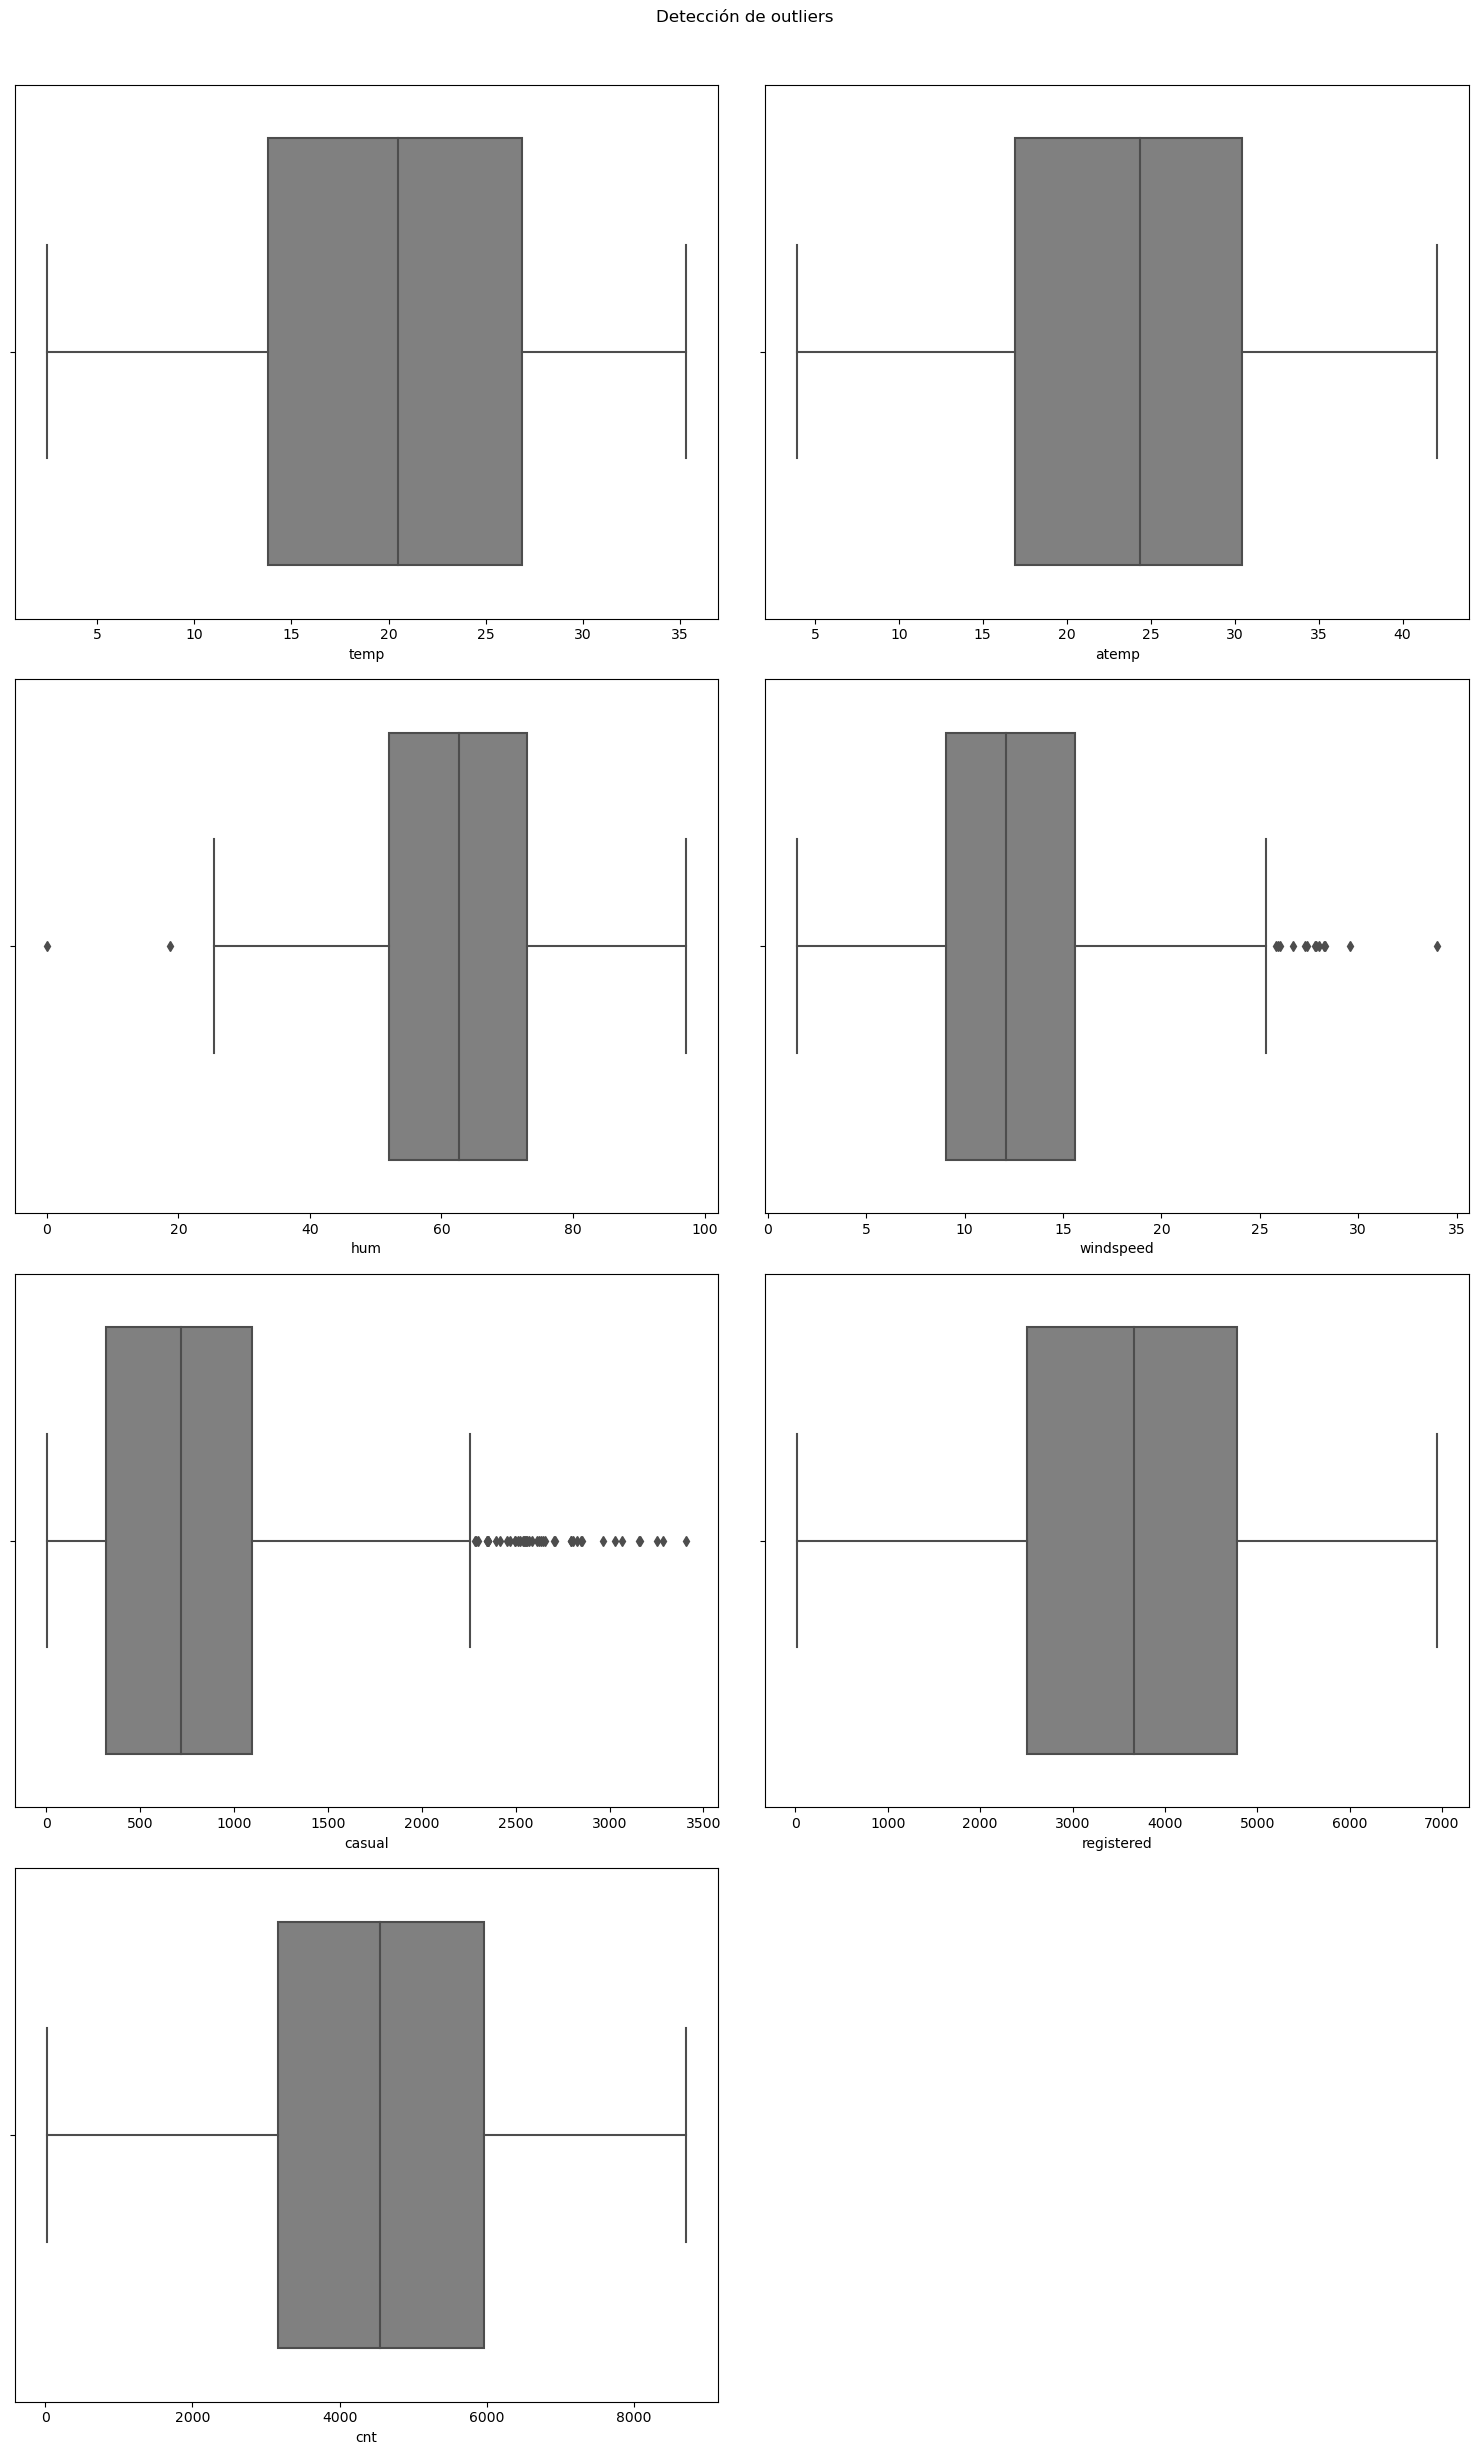

In [44]:
# Boxplot para detección de outliers
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(lista_numericas):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "grey"); # para trazar una línea de densidad

plt.tight_layout()
fig.delaxes(axes[-1])
fig.suptitle('Detección de outliers')
fig.subplots_adjust(top=0.95)
plt.show()

In [45]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    
    for col in lista_columnas:
               
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
                
        IQR = Q3 - Q1
                
        outlier_step = 1.5 * IQR
                
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
                
        if outliers_data.shape[0] > 0:  
        
            dicc_indices[col] = (list(outliers_data.index)) 
            
    return dicc_indices

In [46]:
# Bucle for para printear
for x in numericas:
    try:
        print(f"La columna {x} tiene {len(detectar_outliers([x],numericas)[x])} outliers")
    except:
        print(f"La columna {x} no tiene outliers")

La columna temp no tiene outliers
La columna atemp no tiene outliers
La columna hum tiene 2 outliers
La columna windspeed tiene 13 outliers
La columna casual tiene 44 outliers
La columna registered no tiene outliers
La columna cnt no tiene outliers


In [47]:
index_hum = detectar_outliers(["hum"],numericas)
len(index_hum["hum"])
#la columna "hum" tiene 2 outliers

2

In [48]:
index_wind = detectar_outliers(["windspeed"],numericas)
len(index_wind["windspeed"])
#la columna windspeed tiene 13 outliers

13

In [49]:
index_casual = detectar_outliers(["casual"],numericas)
len(index_casual["casual"])
#la columna casual tiene 44 outliers

44

### Tratamiento de outliers

En ese caso se decide tratar los outliers de las columnas humedad y velocidad de viento con la mediana y hacer una división de dataframe entre las personas usuarias casuales y las registradas.


In [50]:
# Gestión de utliers de humedad, reemplazar por mediana
for k, v in index_hum.items():
    median = numericas[k].median()
    for i in v:
        numericas.loc[i,k] = median


In [51]:
# Gestión de utliers de velocidad del viento, reemplazar por mediana
for k, v in index_wind.items():
    median = numericas[k].median()
    for i in v:
        numericas.loc[i,k] = median

In [52]:
lista_eliminar = numericas.columns.to_list()
lista_eliminar

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [53]:
# Eliminamos aquellas columnas no depuradas
df.drop(lista_eliminar, axis = 1, inplace=True)

In [54]:
df.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit
instant,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2
2,2018-01-02,winter,0,1,0,1,tuesday,1,2


In [55]:
df[numericas.columns]= numericas
df.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


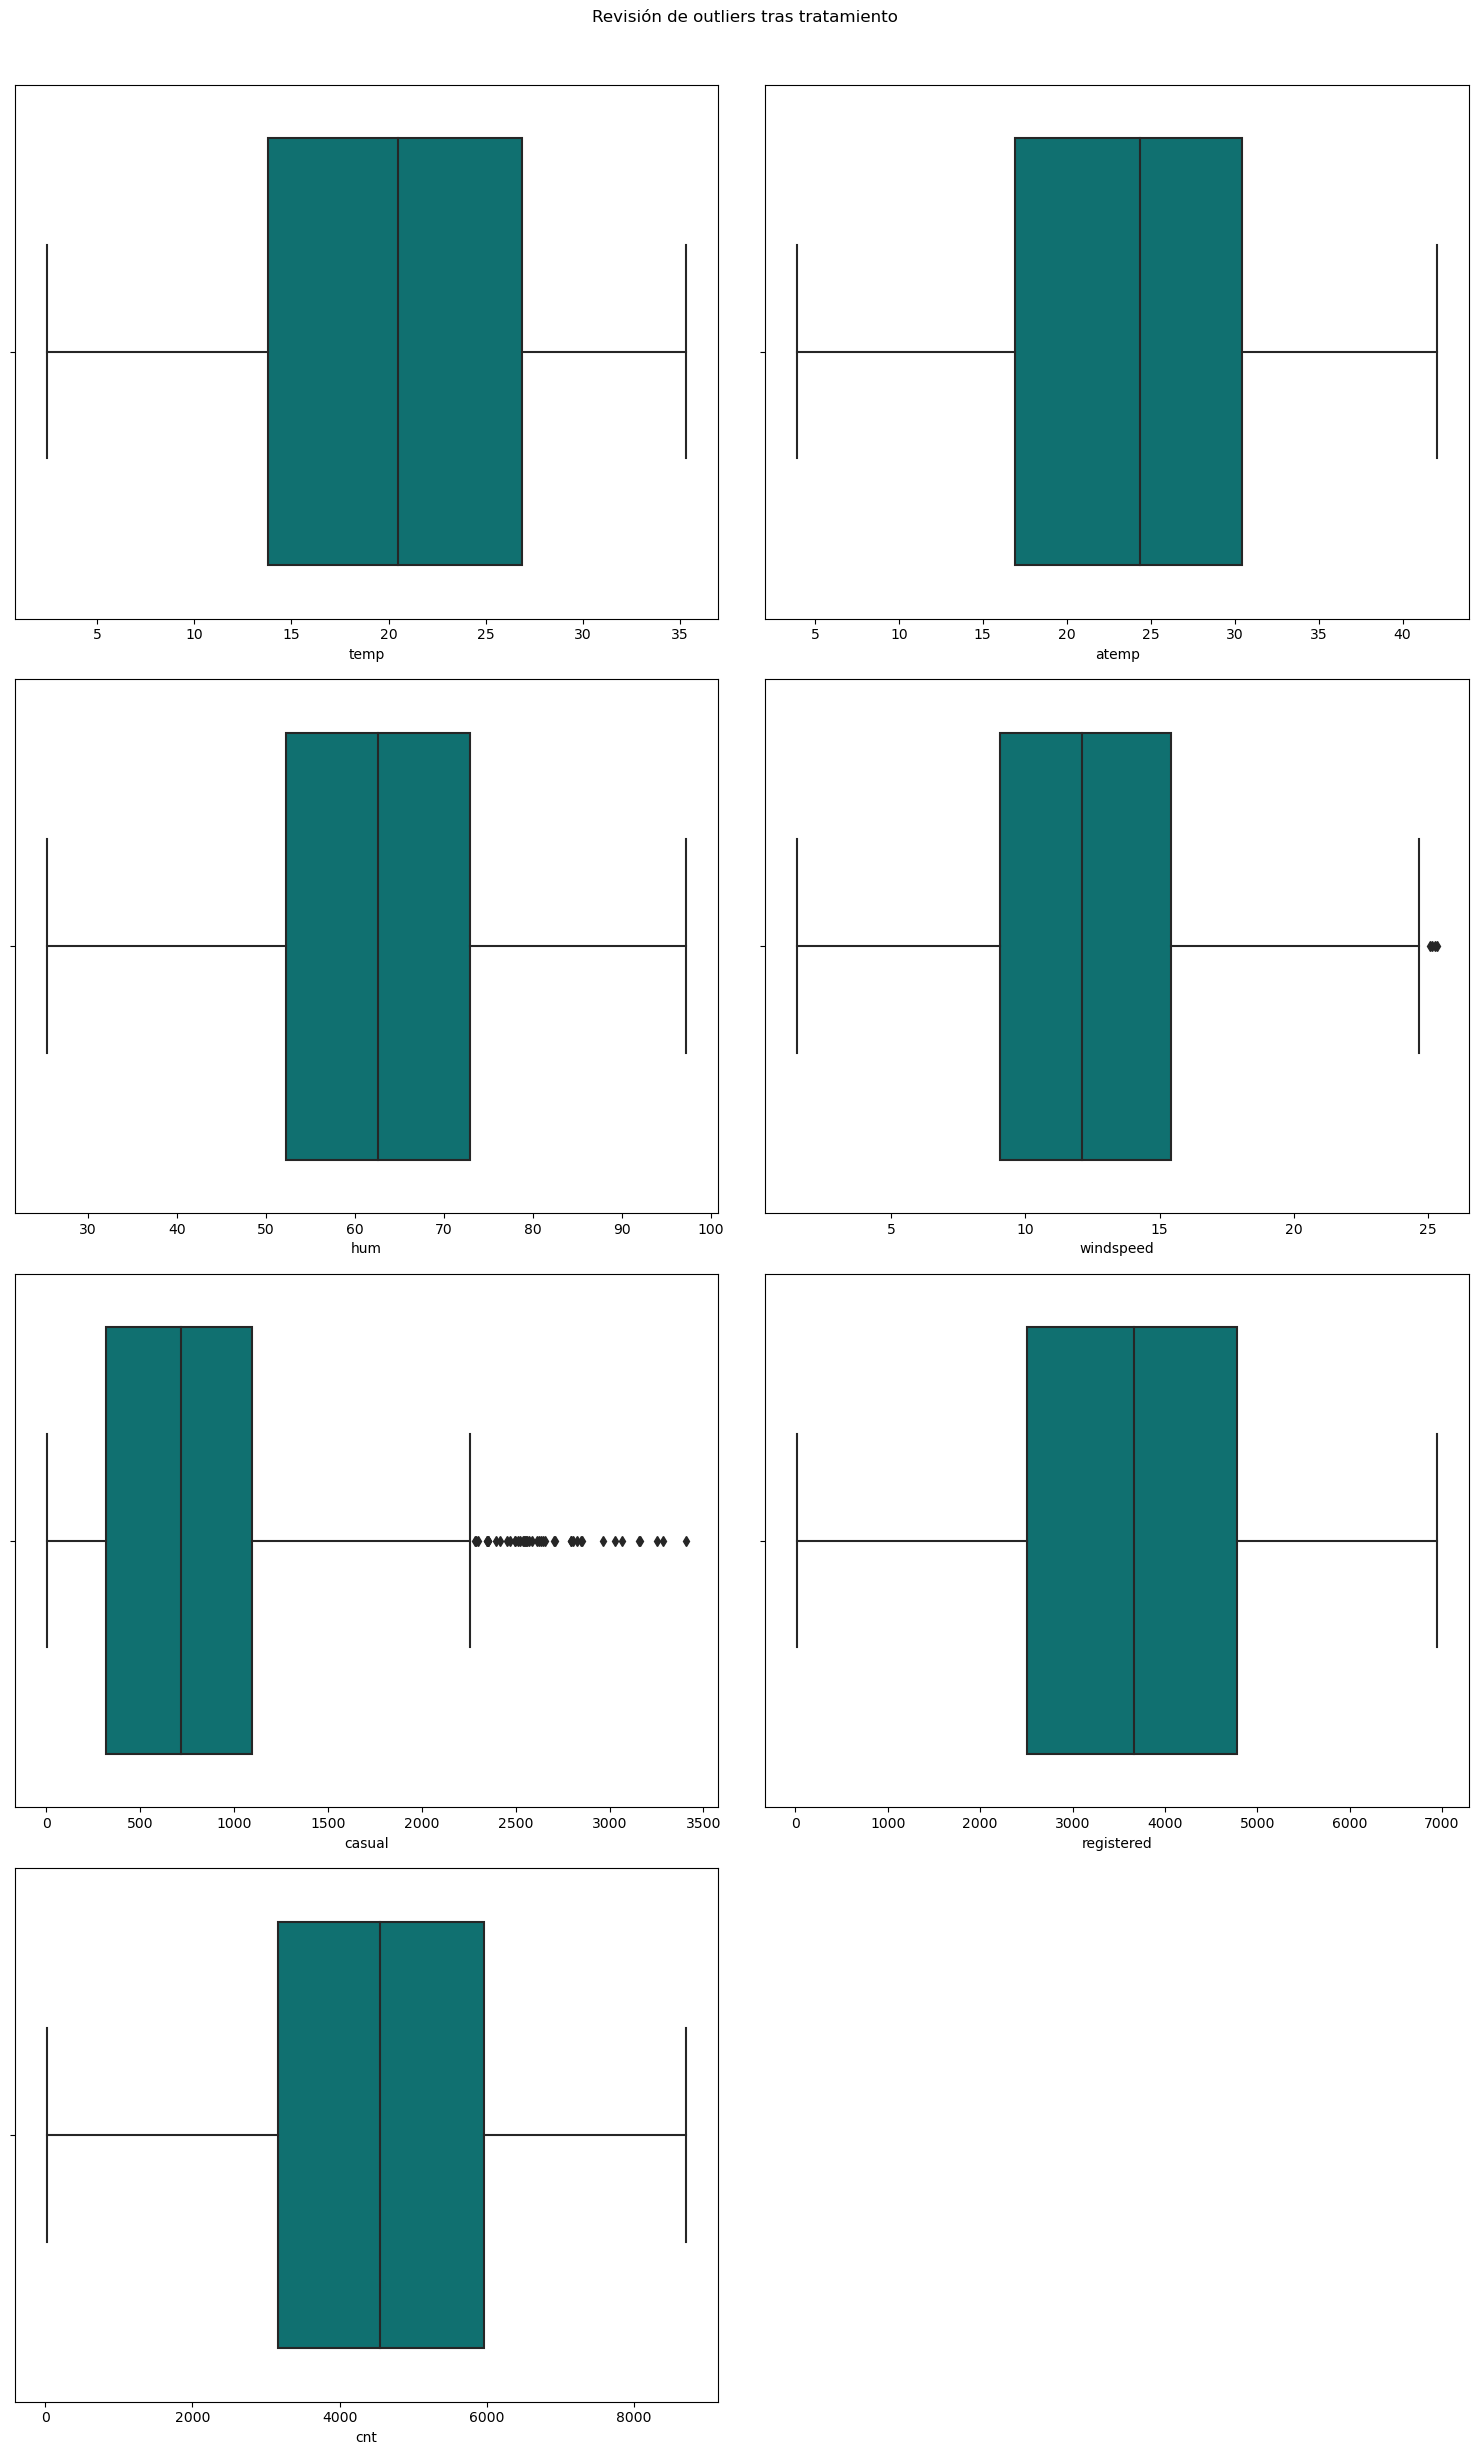

In [56]:
# Observamos el tratamiento de outliers de las columnas humedad y velocidad del viento
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(lista_numericas):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "teal"); # para trazar una línea de densidad

plt.tight_layout()
fig.delaxes(axes[-1])
fig.suptitle('Revisión de outliers tras tratamiento')
fig.subplots_adjust(top=0.95)
plt.show()

In [57]:
# Creamos los df con lo que se trabajará
df_registered = df.drop(['casual'], axis=1)

In [58]:
df_registered.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,654,985
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,670,801


In [59]:
# Creamos los df con lo que se trabajará
df_casual = df.drop(['registered'], axis=1)

In [60]:
df_casual.head(2)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,985
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,801


# Guardamos el dataset limpio y los dos nuevos datasets

In [61]:
df.to_csv("datos/1.bikes_limpio.csv")

In [62]:
df.to_pickle("datos/1.bikes_limpio.pkl")

In [63]:
df_registered.to_csv("datos/1.registrados.csv")

In [64]:
df_registered.to_csv("datos/1.registrados.pkl")

In [65]:
df_casual.to_csv("datos/1.casuales.csv")

In [67]:
df_registered.to_csv("datos/1.casuales.pkl")